In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras

2023-10-15 01:14:51.324658: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-15 01:14:51.528961: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-15 01:14:51.530495: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-15 01:14:52.949503: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos" , origin=dataset_url , cache_dir="." , untar=True)

In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/2307673262_e1e1aefd29.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/13354458753_7b586f7c95_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6606815161_3c4372760f.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/13095941995_9a66faa713_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/20481273479_d459834a3e_n.jpg')]

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/21347496068_f4d3339607.jpg'),
 PosixPath('datasets/flower_photos/roses/5960270643_1b8a94822e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3576488381_611f3446e0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2471103806_87ba53d997_n.jpg'),
 PosixPath('datasets/flower_photos/roses/13264214185_d6aa79b3bd.jpg')]

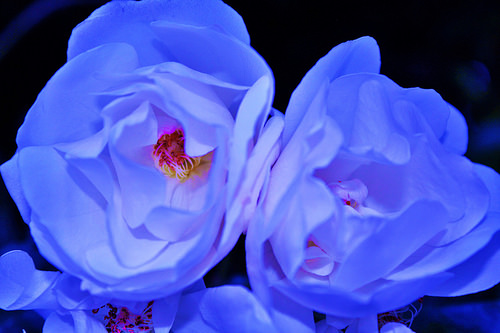

In [8]:
PIL.Image.open(str(roses[0]))

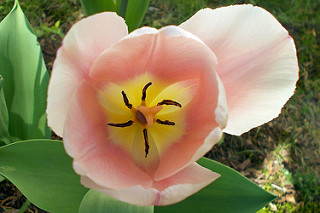

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses' : list(data_dir.glob("roses/*")),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/21347496068_f4d3339607.jpg'),
 PosixPath('datasets/flower_photos/roses/5960270643_1b8a94822e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3576488381_611f3446e0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2471103806_87ba53d997_n.jpg'),
 PosixPath('datasets/flower_photos/roses/13264214185_d6aa79b3bd.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/21347496068_f4d3339607.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[  5,   0,   1],
        [  5,   0,   1],
        [  6,   1,   2],
        ...,
        [  7,   1,   2],
        [  7,   1,   2],
        [  7,   1,   2]],

       [[  6,   0,   1],
        [  6,   0,   1],
        [  7,   1,   2],
        ...,
        [  7,   2,   1],
        [  7,   1,   2],
        [  7,   1,   2]],

       [[  8,   0,   1],
        [  8,   0,   1],
        [  9,   1,   2],
        ...,
        [  7,   2,   1],
        [  7,   2,   1],
        [  7,   2,   1]],

       ...,

       [[161,  23,  10],
        [151,  20,  10],
        [139,  18,   8],
        ...,
        [189,  27,   9],
        [194,  29,  10],
        [194,  29,  10]],

       [[158,  23,   9],
        [151,  21,   8],
        [139,  18,   8],
        ...,
        [190,  29,   9],
        [193,  30,   8],
        [195,  31,   9]],

       [[156,  23,   9],
        [146,  21,   7],
        [134,  18,   7],
        ...,
        [188,  30,   7],
        [191,  30,   8],
        [192,  31,   9]]

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X , y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(16,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(128 , activation="relu"),
    keras.layers.Dense(5)
])

model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

In [ ]:
model.evaluate(X_test_scaled,y_test)

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

In [ ]:
score = tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

In [ ]:
y_test[0]


**Improve Test Accuracy Using Data Augmentation**


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
plt.axis('off')
plt.imshow(X[0])


In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    

In [ ]:
model.evaluate(X_test_scaled,y_test)